# 01. What Is An Artificial Neural Network?

The neural network is based on the concept of biological neurons. In general, our brain is connected with more than 80 billion neurons. The human neural system has three stages: 

*   Receptors (receive the stimuli and pass the information to the outside environment)
*   Neural Networks (make a decision for output after processing the input)
*   Effectors (translate information of neural networks into a response).

![image](https://i.stack.imgur.com/UrGrT.png)

# 02. Neural Network Regression with TensorFlow

A **Regression problem** could be defined as a "processes for estimating the relationships between dependent variables" but in this case, we are going to simplify it to be: **predicting a number**.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs, build a neural network to discover patterns in those inputs and then make a prediction based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

## Architecture of a Regresison Neural Network
In this section we'll get hands on concept of a typical architecture for regression  

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

In [2]:
#Importing Tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Working on Custom data 

Since we're working on a **regression problem** (predicting a number). let's create some linear data (a straight line) to model, view the data and fit it.

Before we do any modelling, can you calculate the pattern between `X` and `y`?

For example, say I asked you, based on this data what the `y` value would be if `X` was 17.0?

Or how about if `X` was -10.0?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

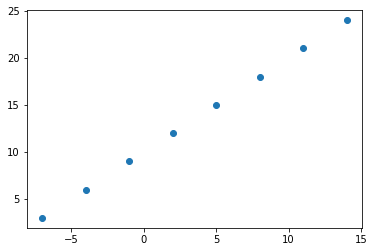

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [4]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price
house_info.shape

TensorShape([3])

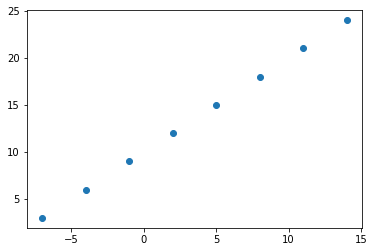

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Our goal here will be to use `X` to predict `y`.

So our **input** will be `X` and our **output** will be `y`.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [6]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [7]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `3.0`.

So now we get our answer, we're trying to use 1 `X` value to predict 1 `y` value.

You might be thinking, "this seems pretty complicated for just predicting a straight line...".

And you'd be right.

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental. 

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: **making sure your input and outputs are in the correct shape**.

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`. 

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


Boom!

We've just trained a model to figure out the patterns between `X` and `y`.

How do you think it went?

In [9]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

What do you think the outcome should be if we passed our model an `X` value of 17.0?

In [10]:
# Make a prediction with the model
model.predict([17.0])

array([[12.716021]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

> 🤔 **Question:** What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, `keras` comes after `tf` (e.g. `tf.keras.layers.Dense()`)?

Before TensorFlow 2.0+, [Keras](https://keras.io/) was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 331ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 1

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher). 

What do you think this means for when we make a prediction with our model?

How about we try predict on 17.0 again?

In [12]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

array([[30.158512]], dtype=float32)

Much better! 

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


## Boston Housing Dataset

The dataset is available from the [kaggle Datasets](https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction/data).



In [14]:
#@title Import relevant modules
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
#dataset
from sklearn.datasets import load_boston
#model
from tensorflow.keras import layers
from sklearn import metrics
#data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
boston = load_boston()

In [16]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [20]:
# See head of the dataset
data.head()
# data.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Preprocessing of the data

The dataset contains a few unknown values:

### Data Description
* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per 10,000usd
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population

Each record in the database describes a Boston suburb or town.

In [21]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
print(data.head())
print(data.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
(506, 13)


In [22]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
data.shape

(506, 14)

In [23]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [24]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [25]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [26]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualizing the data

Now we've got our  data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

In [27]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

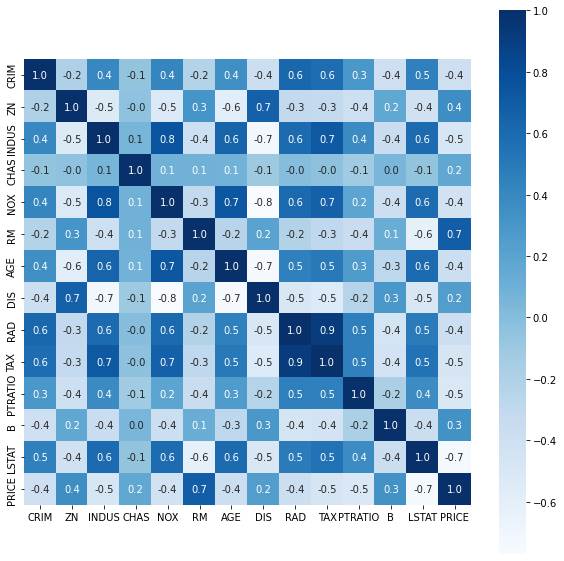

In [28]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

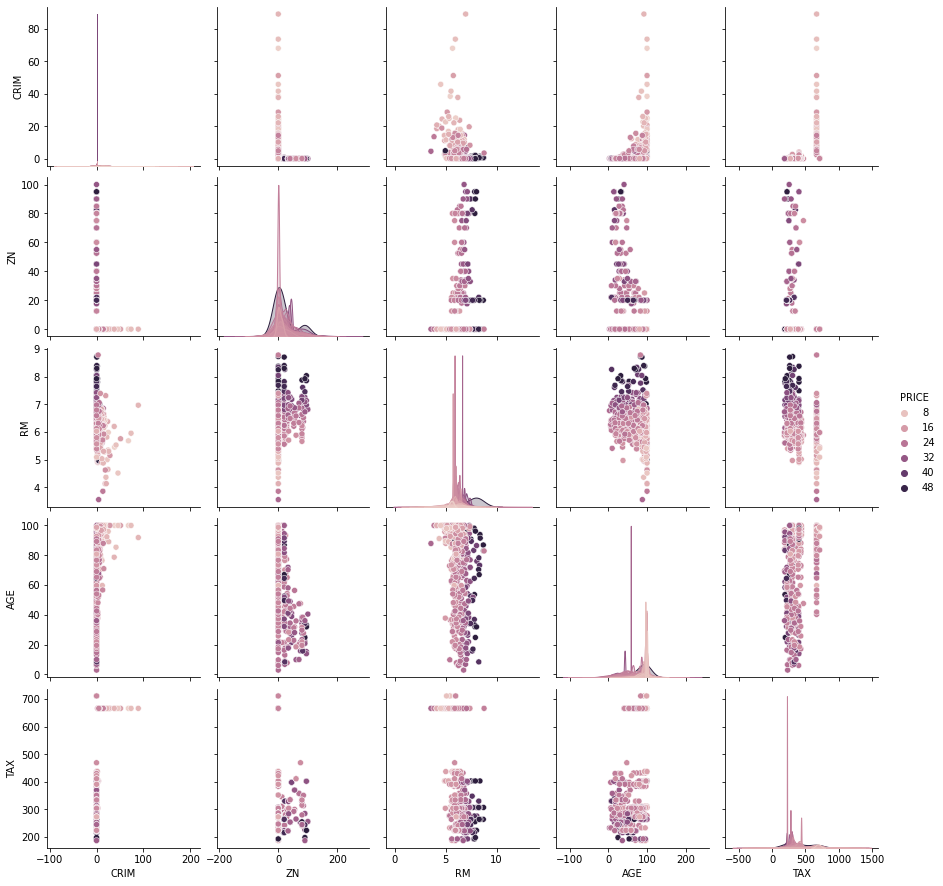

In [29]:
sns.pairplot(data, hue = 'PRICE', vars = ['CRIM','ZN','RM','AGE','TAX'])

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available.

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [30]:

from sklearn.model_selection import train_test_split
# Split data
x_model=data[data.columns[:12]]
y_model=data[['PRICE']]

x_trainval,x_test,y_trainval,y_test=train_test_split(x_model,y_model,test_size=0.2,random_state=6)

In [31]:
# Scale features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_trainval=scaler.fit_transform(x_trainval)
x_test=scaler.transform(x_test)
df_new=pd.DataFrame(x_trainval,columns=data.columns[:12])
df_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-0.392629,-0.486992,-0.583985,-0.262265,-0.900956,-1.280656,0.970946,0.970084,-0.735320,-1.031208,-0.232420,0.438235
1,0.495887,-0.486992,1.037800,-0.262265,1.395968,0.175232,1.077022,-0.782386,1.697776,1.558835,0.824158,-0.560055
2,-0.419608,-0.486992,-0.833267,-0.262265,-0.320224,-0.336760,-1.079858,0.467027,-0.503597,-1.085043,0.824158,0.430049
3,0.990950,-0.486992,1.037800,-0.262265,1.283288,-1.799799,1.031056,-0.979747,1.697776,1.558835,0.824158,0.438235
4,-0.408060,0.768025,-0.870950,-0.262265,-1.074308,0.140908,-2.122939,1.524359,-0.387735,-0.630439,-0.829616,0.199244
...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.402729,-0.486992,-0.344848,-0.262265,-0.276886,-0.655683,0.850727,-0.770022,-0.503597,-0.127983,1.145725,0.424987
400,1.479405,-0.486992,1.037800,-0.262265,0.243172,-0.526970,0.111730,-0.438360,1.697776,1.558835,0.824158,0.134946
401,-0.373262,-0.486992,-0.686886,-0.262265,-0.415568,1.242120,0.426422,-0.292218,-0.156012,-0.588568,-0.462111,0.170918
402,-0.419438,2.964306,-1.291251,-0.262265,-1.186988,-0.189455,-1.040963,1.160311,-0.851182,-0.343321,-1.702441,0.404524


## Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) on it.

> 🔑 **Note:** Visualizing a model is particularly helpful when you run into input and output shape mismatches.

Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [32]:
#@title Libraries for model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout


In [33]:
model=keras.Sequential([
                           layers.Dense(13,activation='relu',input_shape=(12,)),
                           layers.Dense(28,activation='relu'),
                           layers.Dense(13,activation='relu'),
                           layers.Dense(8,activation='relu'),
                           layers.Dense(1)

])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                169       
                                                                 
 dense_3 (Dense)             (None, 28)                392       
                                                                 
 dense_4 (Dense)             (None, 13)                377       
                                                                 
 dense_5 (Dense)             (None, 8)                 112       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,059
Trainable params: 1,059
Non-trainable params: 0
_________________________________________________________________


Alongside summary, you can also view a 2D plot of the model using [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

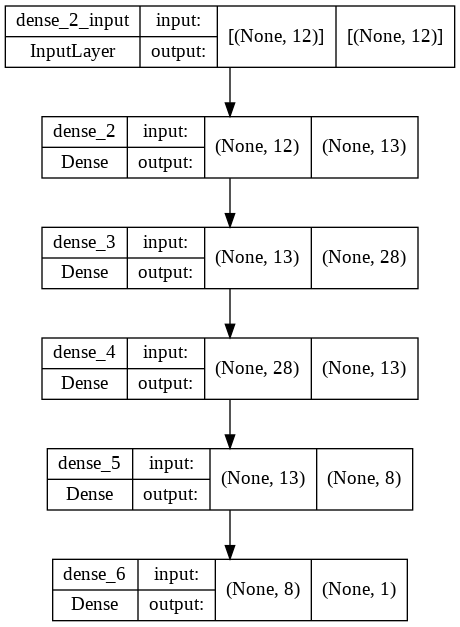

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

In [35]:
# compile the model
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [36]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

monitor_val_acc=EarlyStopping(monitor='val_mae',patience=15, verbose=1)

modelCheckpoint=ModelCheckpoint('best_model.hdf5',save_best_only=True, verbose=1)

history=model.fit(x_trainval,y_trainval,validation_split=0.2,batch_size=50,epochs=500,verbose=1, callbacks=[monitor_val_acc,modelCheckpoint])

Epoch 1/500
1/7 [===>..........................] - ETA: 4s - loss: 608.3448 - mae: 22.9419
Epoch 1: val_loss improved from inf to 561.69629, saving model to best_model.hdf5
7/7 [==============================] - 1s 45ms/step - loss: 610.2604 - mae: 22.8985 - val_loss: 561.6963 - val_mae: 22.1621
Epoch 2/500
1/7 [===>..........................] - ETA: 0s - loss: 614.0221 - mae: 23.1194
Epoch 2: val_loss improved from 561.69629 to 555.61444, saving model to best_model.hdf5
7/7 [==============================] - 0s 12ms/step - loss: 603.2768 - mae: 22.7186 - val_loss: 555.6144 - val_mae: 22.0129
Epoch 3/500
1/7 [===>..........................] - ETA: 0s - loss: 594.6484 - mae: 22.3848
Epoch 3: val_loss improved from 555.61444 to 549.79419, saving model to best_model.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 596.7051 - mae: 22.5596 - val_loss: 549.7942 - val_mae: 21.8761
Epoch 4/500
1/7 [===>..........................] - ETA: 0s - loss: 622.5198 - mae: 22.8346
Epoch 

## Evaluating predictions

Alongisde visualizations, evaluation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

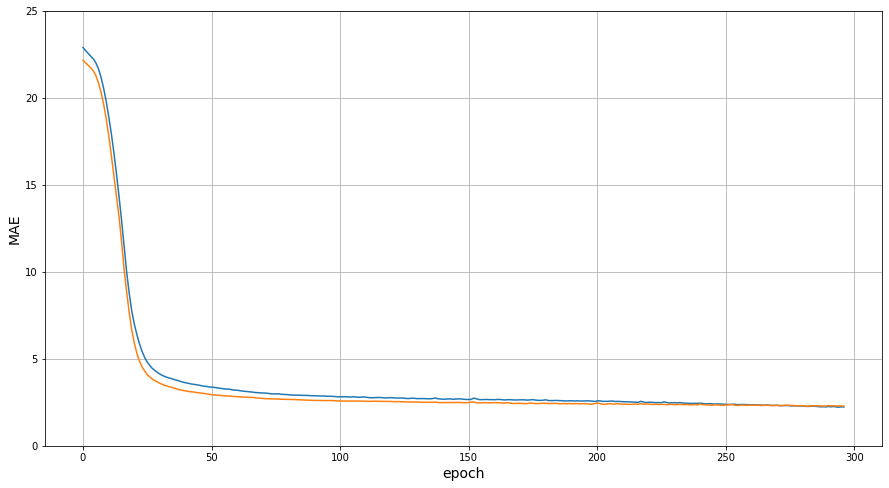

In [37]:
# plot training log
plt.figure(figsize=(15,8))
plt.grid(True)

plt.xlabel('epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.ylim([0,25])

plt.plot(history.history['mae'][0:])
plt.plot(history.history['val_mae'][0:])
plt.show()

In [38]:
# Average house value
data['PRICE'].mean()

22.532806324110677

In [39]:
# Loss and Mae on test set

test_loss, test_mae=model.evaluate(x_test,y_test,batch_size=32,verbose=0)

print(f"We are off on average by {round(test_mae * 1000, 2)} US dollars, while the mean price of a house in the dataset is {round(data['PRICE'].mean() * 1000, 2)}.")
print(f"The mse on the test set is {round(test_loss, 2)}")

We are off on average by 2943.17 US dollars, while the mean price of a house in the dataset is 22532.81.
The mse on the test set is 21.81


## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [40]:
# make predictions with the model
predictions=model.predict(x_test)

In [41]:
data_test=y_test
data_test['Prediction']=predictions
data_test

,PRICE,Prediction
375,15.0,18.523741
347,23.1,25.223913
223,30.1,23.832413
501,22.4,23.422758
286,20.1,21.932207
...,...,...
459,20.0,18.420603
288,22.3,20.244596
379,10.2,12.943515
16,23.1,23.249842


In [42]:
from sklearn.metrics import r2_score

R2=r2_score(data_test['PRICE'],data_test['Prediction'])
R2

0.7467734869931915

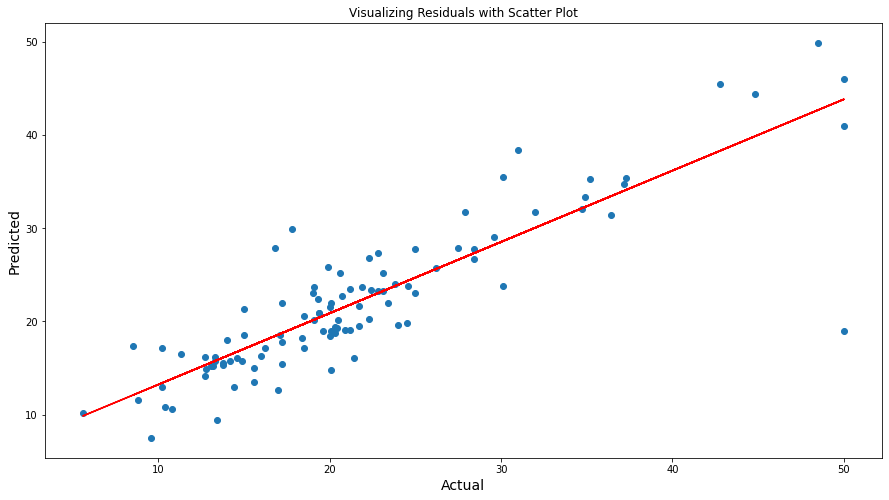

0.7649846794764923 5.583987484804282


In [43]:
# Visualize Residuals with Scatter Plot

plt.figure(figsize=(15,8))

plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)

plt.scatter(data_test['PRICE'],data_test['Prediction'])

m,b=np.polyfit(data_test['PRICE'],data_test['Prediction'],1)
plt.plot(data_test['PRICE'],m*(data_test['PRICE'])+b,'r')

plt.title("Visualizing Residuals with Scatter Plot")
plt.show()
print(m,b)

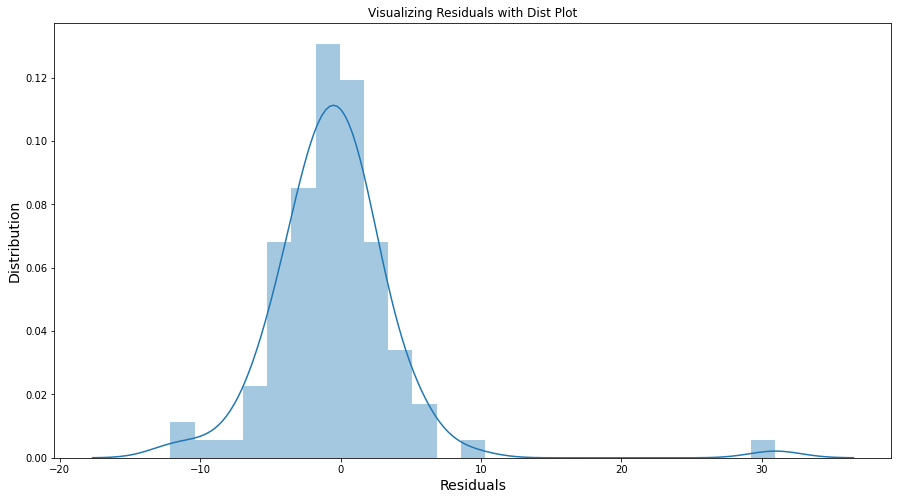

In [44]:
# Visualize Residuals with Dist Plot

plt.figure(figsize=(15,8))

plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Distribution', fontsize=14)

sns.distplot(data_test['PRICE']-data_test['Prediction'])

plt.title("Visualizing Residuals with Dist Plot")
plt.show()

## Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [45]:
# Save a model using the SavedModel format
model.save('model_SavedModel_format')

In [46]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.

In [47]:
# Save a model using the HDF5 format
model.save("model_HDF5_format.h5") # note the addition of '.h5' on the end

In [48]:
# Check it out
!ls model_HDF5_format.h5

model_HDF5_format.h5


## Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [49]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                169       
                                                                 
 dense_3 (Dense)             (None, 28)                392       
                                                                 
 dense_4 (Dense)             (None, 13)                377       
                                                                 
 dense_5 (Dense)             (None, 8)                 112       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,059
Trainable params: 1,059
Non-trainable params: 0
_________________________________________________________________


Loading in from the HDF5 is much the same.

In [50]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                169       
                                                                 
 dense_3 (Dense)             (None, 28)                392       
                                                                 
 dense_4 (Dense)             (None, 13)                377       
                                                                 
 dense_5 (Dense)             (None, 8)                 112       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,059
Trainable params: 1,059
Non-trainable params: 0
_________________________________________________________________


## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [51]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>